In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from project_key import email
from project_key import key

In [30]:
list_state = ['48', '36', '06']
df_daily = pd.DataFrame()
for state in list_state:
    try:
        url_daily = 'https://aqs.epa.gov/data/api/dailyData/byState?'
        params = {'email': email,
                 'key': key,
                 'param': '88101',
                 'bdate':'20200101',
                 'edate':'20201201',
                 'state': state}

        response = requests.get(url_daily, params=params).json()
        data=response['Data']
        int_df_daily = pd.DataFrame(data)
        df_daily = df_daily.append(int_df_daily)
    except:
        pass
df_daily.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,48,323,0004,88101,1,28.704607,-100.451156,WGS84,PM2.5 - Local Conditions,1,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,Eagle Pass,265 Foster Maldonado,Texas,Maverick,Eagle Pass,20580,"Eagle Pass, TX",2021-10-31
1,48,323,0004,88101,1,28.704607,-100.451156,WGS84,PM2.5 - Local Conditions,X,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,Eagle Pass,265 Foster Maldonado,Texas,Maverick,Eagle Pass,20580,"Eagle Pass, TX",2021-10-31
2,48,323,0004,88101,1,28.704607,-100.451156,WGS84,PM2.5 - Local Conditions,X,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,Eagle Pass,265 Foster Maldonado,Texas,Maverick,Eagle Pass,20580,"Eagle Pass, TX",2021-10-31
3,48,323,0004,88101,1,28.704607,-100.451156,WGS84,PM2.5 - Local Conditions,X,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,Eagle Pass,265 Foster Maldonado,Texas,Maverick,Eagle Pass,20580,"Eagle Pass, TX",2021-10-31
4,48,323,0004,88101,1,28.704607,-100.451156,WGS84,PM2.5 - Local Conditions,X,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,Eagle Pass,265 Foster Maldonado,Texas,Maverick,Eagle Pass,20580,"Eagle Pass, TX",2021-10-31


In [31]:
df_daily.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration_code',
       'sample_duration', 'pollutant_standard', 'date_local',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'arithmetic_mean',
       'first_max_value', 'first_max_hour', 'aqi', 'method_code', 'method',
       'local_site_name', 'site_address', 'state', 'county', 'city',
       'cbsa_code', 'cbsa', 'date_of_last_change'],
      dtype='object')

In [32]:
PM25_annual_2012_daily = df_daily.loc[df_daily['pollutant_standard'] == 'PM25 Annual 2012']
PM25_annual_2012_daily.to_csv('output/data.csv2')

In [33]:
PM25_annual_2012_daily_group = PM25_annual_2012_daily.groupby(['state_code'])
PM25_annual_2012_daily_group['event_type'].value_counts()

state_code  event_type
06          None          34105
            Included       1849
36          None           3892
48          None          12550
Name: event_type, dtype: int64

In [60]:
PM25_daily_df = PM25_annual_2012_daily.loc[PM25_annual_2012_daily['event_type'] == 'None',:]
PM25_daily_df.head()
PM25_daily_df_noNA = PM25_daily_df.dropna(subset=['arithmetic_mean'])

In [68]:
PM25_daily_df_group = PM25_daily_df_noNA.groupby(['state_code'])
PM25_daily_df_group['event_type'].value_counts()

state_code  event_type
06          None          34105
36          None           3892
48          None          12550
Name: event_type, dtype: int64

In [69]:
list_state = ['48', '36', '06']

outlier_removed_daily = pd.DataFrame()

for state in list_state:
    quartiles = PM25_daily_df_noNA.loc[PM25_daily_df_noNA['state_code'] == state, :]['arithmetic_mean'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_df = PM25_daily_df_noNA.loc[(PM25_daily_df_noNA['state_code'] == state) & ((PM25_daily_df_noNA['arithmetic_mean'] > lower_bound) & (PM25_daily_df_noNA['arithmetic_mean'] < upper_bound))]
    outlier_removed_daily= outlier_removed_daily.append(outlier_df)
outlier_removed_daily.head()

In [91]:
outlier_removed_daily_group = outlier_removed_daily.groupby(['state_code'])
summary_stats_daily =outlier_removed_daily_group.describe()

summary_stats_daily.to_csv('output/daily_stats.csv2')
summary_stats_daily

poc                                               latitude  \
              count      mean       std  min  25%  50%  75%   max    count   
state_code                                                                   
06          31140.0  2.520906  1.682203  1.0  1.0  3.0  3.0  21.0  31140.0   
36           3763.0  2.461068  1.422931  1.0  1.0  3.0  4.0   4.0   3763.0   
48          11884.0  2.192107  1.361473  1.0  1.0  2.0  3.0   8.0  11884.0   

                       ... first_max_hour           aqi                        \
                 mean  ...            75%  max    count       mean        std   
state_code             ...                                                      
06          36.239581  ...            0.0  0.0  31140.0  33.039595  18.048790   
36          42.101194  ...            0.0  0.0   3763.0  24.979006  11.350622   
48          30.321206  ...            0.0  0.0  11884.0  32.514053  13.802074   

                                         
            min   25%   50%   75%   max  
state_code                               
06          0.0  19.0  30.0  46.0  78.0  
36          0.0  17.0  23.0  32.0  55.0  
48          0.0  22.0  31.0  42.0  65.0  

[3 rows x 72 columns]

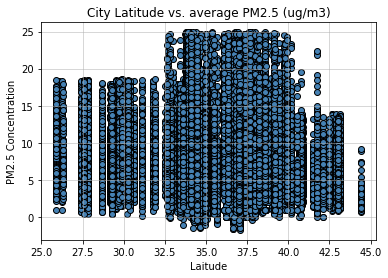

In [70]:
plt.scatter(outlier_removed_daily["latitude"], outlier_removed_daily["arithmetic_mean"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. average PM2.5 (ug/m3)")
plt.xlabel("Laitude")
plt.ylabel("PM2.5 Concentration")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs PM2.5.png")

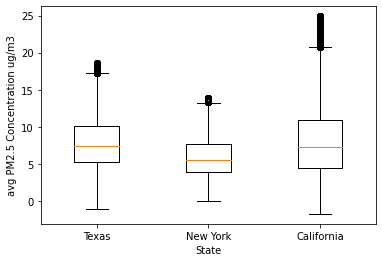

In [71]:
state_48 = outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '48']['arithmetic_mean']
state_36 = outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '36']['arithmetic_mean']
state_06 = outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '06']['arithmetic_mean']

data_to_plot = [state_48, state_36, state_06]
states = ['Texas', 'New York', 'California']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('avg PM2.5 Concentration ug/m3')
ax1.set_xlabel('State')
ax1.boxplot(data_to_plot, labels=states, widths = 0.4, vert=True)
plt.show()

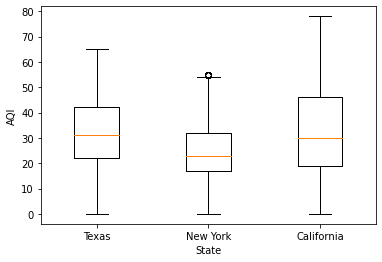

In [73]:
state_48 = outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '48']['aqi']
state_36 = outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '36']['aqi']
state_06 = outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '06']['aqi']

data_to_plot = [state_48, state_36, state_06]
states = ['Texas', 'New York', 'California']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('AQI')
ax1.set_xlabel('State')
ax1.boxplot(data_to_plot, labels=states, widths = 0.4, vert=True)
plt.show()

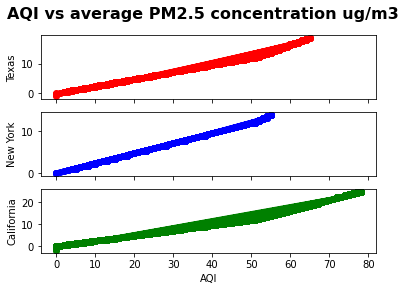

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("AQI vs average PM2.5 concentration ug/m3", fontsize=16, fontweight="bold")

ax1.plot(outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '48']['aqi'], outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '48']['arithmetic_mean'], linewidth=1, marker="o",color = 'r')
ax1.set_ylabel("Texas")

ax2.plot(outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '36']['aqi'], outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '36']['arithmetic_mean'], linewidth=1, marker="o", color = 'b')
ax2.set_ylabel("New York")

ax3.plot(outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '06']['aqi'], outlier_removed_daily.loc[outlier_removed_daily['state_code'] == '06']['arithmetic_mean'], linewidth=1, marker="o", color = 'g')
ax3.set_ylabel("California")
ax3.set_xlabel("AQI")

plt.show()